<a href="https://colab.research.google.com/github/rry123/Machine-Learning/blob/main/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# # data (as pandas dataframes)
# X = iris.data.features
# y = iris.data.targets

# # metadata
# print(iris.metadata)

# # variable information
# print(iris.variables)

data = iris.data.original;
data.shape


(150, 5)

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Assuming df is your original DataFrame with features and target
df = pd.DataFrame(data)

print(df.head())
# Replace df with your actual DataFrame
print(df.columns)

#for val in df.columns:
null_values = (df.isnull())

print(null_values.sum())


   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')
sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64


In [5]:
y=df["class"]
x=df.drop("class",axis=1)
print(x)
print(y)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: objec

In [6]:
for i in x :

  mean_without_null = np.nanmean(x[i])
  print(i)
  print(mean_without_null)
  x[i]=x[i].fillna(mean_without_null)

sepal length
5.843333333333334
sepal width
3.0540000000000003
petal length
3.758666666666666
petal width
1.1986666666666668


In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train)

     sepal length  sepal width  petal length  petal width
22            4.6          3.6           1.0          0.2
15            5.7          4.4           1.5          0.4
65            6.7          3.1           4.4          1.4
11            4.8          3.4           1.6          0.2
42            4.4          3.2           1.3          0.2
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[120 rows x 4 columns]


In [8]:
def normal_dist(x, mean, sd):
    prob_density = 1/(np.sqrt(np.pi*2)*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density



In [9]:
def fit(x,y):
  sum={}
  ss={}
  mean={}
  sd={}
  elements={}
  k=np.unique(y)
  j=0
  for i in k:
    sum[i]={}
    ss[i]={}

    elements[i]=[]
    sd[i]={}
    mean[i]={}
    for a in x:
      sum[i][a]=0

      ss[i][a]=0
      mean[i][a]=0
      sd[i][a]=0
  while(j<120):
    elements[y.iloc[j]].append(x.iloc[j])
    # print(y.iloc[j])
    # print(x.iloc[j])
    j=j+1
  # newElements=pd.DataFrame(elements)
  for i in k:
    for j in elements[i]:
      b=np.array(j)

      c=0
      # print(i)
      # print(b)
      for a in x:
        sum[i][a]+=b[c]
        ss[i][a]+=b[c]*b[c]

        c=c+1

  # print(sum)
  # print(ss)
  for i in k:
    for a in x:
      mean[i][a]=sum[i][a]/len(elements[i])
      sd[i][a]=ss[i][a]/len(elements[i])-mean[i][a]**2
  mean_sd=[mean,sd]
  return mean_sd




In [10]:
mean_sd=fit(X_train,y_train)
print(mean_sd)

[{'Iris-setosa': {'sepal length': 4.99, 'sepal width': 3.44, 'petal length': 1.4524999999999997, 'petal width': 0.2425}, 'Iris-versicolor': {'sepal length': 5.919512195121952, 'sepal width': 2.770731707317073, 'petal length': 4.241463414634147, 'petal width': 1.3219512195121947}, 'Iris-virginica': {'sepal length': 6.533333333333333, 'sepal width': 2.966666666666667, 'petal length': 5.52051282051282, 'petal width': 1.9999999999999996}}, {'Iris-setosa': {'sepal length': 0.12389999999999546, 'sepal width': 0.15490000000000315, 'petal length': 0.03299375000000104, 'petal width': 0.01144375000000001}, 'Iris-versicolor': {'sepal length': 0.2869363474122508, 'sepal width': 0.10011897679952497, 'petal length': 0.22584176085662122, 'petal width': 0.041225461035099054}, 'Iris-virginica': {'sepal length': 0.4165811965812125, 'sepal width': 0.0991452991452988, 'petal length': 0.2857330703484493, 'petal width': 0.08205128205128354}}]


In [11]:
def predict(mean_sd,x):
  p=[]
  k=np.unique(y_train)
  max=0
  ret=0
  c=0
  for i in k:
    prob=1
    c=0
    for j in X_train:
      prob=prob*normal_dist(x[c],mean_sd[0][i][j],mean_sd[1][i][j])
      c=c+1
    if(prob>max):
      max=prob
      ret=i
  return ret

In [12]:
j=0
predictions=[]
while(j<len(X_test)):
  predictions.append(predict(mean_sd,np.array(X_test.iloc[j])))
  j=j+1

In [13]:
accuracy = np.mean(predictions== y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [15]:
empty_list=predictions

In [16]:
from sklearn import metrics
precision = metrics.precision_score(y_test, empty_list, average='weighted')
recall = metrics.recall_score(y_test, empty_list, average='weighted')
f1_score = metrics.f1_score(y_test, empty_list, average='weighted')
print("Average Precision:", precision)
print("Average Recall:", recall)
print("F1 Score:", f1_score)

Average Precision: 0.9694444444444444
Average Recall: 0.9666666666666667
F1 Score: 0.9664109121909632


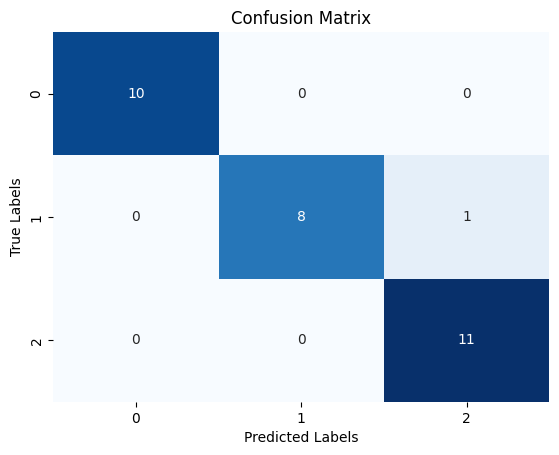

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = metrics.confusion_matrix(y_test, empty_list)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()